<font size="5">
    Calorie Burn Rate Analysis
    Group 11
</font><br><br>
<font size="5">
    Karthik P M <br>
    AM.EN.U4CSE20138

</font>

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')


In [93]:
path1='exercise.csv'
exercise=pd.read_csv(path1)
exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29,105,40.8
1,14861698,female,20,166.0,60.0,14,94,40.3
2,11179863,male,69,179.0,79.0,5,88,38.7
3,16180408,female,34,179.0,71.0,13,100,40.5
4,17771927,female,27,154.0,58.0,10,81,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11,92,40.4
14996,17212577,female,27,165.0,65.0,6,85,39.2
14997,17271188,female,43,159.0,58.0,16,90,40.1
14998,18643037,male,78,193.0,97.0,2,84,38.3


In [94]:
path2='calories.csv'
calories=pd.read_csv(path2)
calories

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


<font size="5">1.Data Preprocessing</font>

<font size=3>Checking whether null values exist in the dataset</font>

In [95]:
exercise.isnull().sum()

User_ID        0
Gender         0
Age            0
Height         4
Weight        17
Duration       0
Heart_Rate     0
Body_Temp      0
dtype: int64


<font size=3>From this it is understood that the attributes that have null values are Height , Weight respectively</font>


<font size="5">Filling Missing values for weight using averaging in an age interval</font>

In [96]:
import statistics
# storing the data for null weights and setting the nan values as zero 
NullWeight = exercise[exercise["Weight"].isnull()].replace(np.nan , 0) 

print("Before : \n ")
print(NullWeight)

exercise["Weight"] = exercise["Weight"].replace(np.nan , 0)  
# storing the data for null weights and setting the nan values as zero 

i = 0
for age in NullWeight['Age']:    # accessing each age 
    age = age // 10       # setting up the range for age
    age = age * 10
    ageRange = exercise[(exercise["Age"] >= age) & (exercise["Age"] <= age + 10)]  
    # collecting age interval for a given age
    
    ageRangeAverage = np.nanmean(ageRange["Weight"]) 
    # calculating the mean of the particular interval
    
    exercise["Weight"].iloc[i] = ageRangeAverage    # updating the mean inplace for the missing values in the main dataset
    NullWeight["Weight"].iloc[i] = ageRangeAverage
    i += 1
    
print("\nAfter:\n")
NullWeight  # displaying the updated result for the range of null dataset


Before : 
 
       User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
114   13616455    male   21   189.0     0.0        27         114       41.0
123   18789619  female   35   182.0     0.0         2          83       38.4
162   19572798  female   38   169.0     0.0        14          94       40.1
200   12847212  female   30   168.0     0.0         6          76       39.4
269   13135068  female   69   156.0     0.0         8          83       39.4
797   16156697  female   43   173.0     0.0        30          79       38.2
802   19354925    male   33   181.0     0.0         4          89       38.6
808   16908484  female   46   168.0     0.0         2          85       37.7
872   19928569  female   39   159.0     0.0        15          93       40.0
878   19906933    male   53   179.0     0.0        14          93       40.0
942   16583091  female   28   163.0     0.0        27          99       41.1
1013  15330323    male   58   191.0     0.0        16          9

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
114,13616455,male,21,189.0,73.181027,27,114,41.0
123,18789619,female,35,182.0,74.458074,2,83,38.4
162,19572798,female,38,169.0,74.458074,14,94,40.1
200,12847212,female,30,168.0,74.458074,6,76,39.4
269,13135068,female,69,156.0,76.178569,8,83,39.4
797,16156697,female,43,173.0,75.407039,30,79,38.2
802,19354925,male,33,181.0,74.466627,4,89,38.6
808,16908484,female,46,168.0,75.407039,2,85,37.7
872,19928569,female,39,159.0,74.472098,15,93,40.0
878,19906933,male,53,179.0,75.672227,14,93,40.0


<font size="5">Filling Missing values for Height and Weight  using averaging in an age interval</font>

In [97]:
NullHeight = exercise[exercise["Height"].isnull()].replace(np.nan , 0) 
# storing the data for null heights and setting the nan values as zero 

print("Before : \n ")
print(NullHeight)

exercise["Height"] = exercise["Height"].replace(np.nan , 0) 
# storing the data for null heights and setting the nan values as zero



i = 0
for age in NullHeight['Age']:   # accessing each age 
    age = age // 10   # setting up the range for age
    age = age * 10
    ageRange = exercise[(exercise["Age"] >= age) & (exercise["Age"] <= age + 10)] 
    # collecting age interval for a given age
    
    ageRangeAverage = np.nanmean(ageRange["Height"])  # calculating the mean of the particular interval
    exercise["Height"].iloc[i] = ageRangeAverage   # updating the mean inplace for the missing values in the main dataset
    NullHeight["Height"].iloc[i] = ageRangeAverage
    i += 1
print("\nAfter:\n")
NullHeight  # displaying the updated result for the range of null dataset


Before : 
 
      User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
17   15236104    male   46     0.0    67.0        11          89       40.2
52   10146087  female   21     0.0    73.0         9          90       39.6
68   13777657    male   45     0.0    69.0        22         113       40.6
102  10481882  female   31     0.0    60.0        25         115       40.8

After:



,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
17,15236104,male,46,174.562739,67.0,11,89,40.2
52,10146087,female,21,174.173175,73.0,9,90,39.6
68,13777657,male,45,174.562739,69.0,22,113,40.6
102,10481882,female,31,174.423704,60.0,25,115,40.8


In [98]:
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

<font size="5">Normalization of data set</font>

In [99]:
from sklearn.preprocessing import MinMaxScaler
print ("Before Normalization : \n")
exercise.head()

Before Normalization : 



,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,174.562739,73.181027,29,105,40.8
1,14861698,female,20,174.173175,74.458074,14,94,40.3
2,11179863,male,69,174.562739,74.458074,5,88,38.7
3,16180408,female,34,174.423704,74.458074,13,100,40.5
4,17771927,female,27,154.000000,76.178569,10,81,39.8


In [100]:
norm = MinMaxScaler()
data = exercise
data["Duration"] = norm.fit_transform(data["Duration"].values.reshape(-1,1))
print ("After Normalisation : \n")
data.head()

After Normalisation : 



,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,174.562739,73.181027,0.965517,105,40.8
1,14861698,female,20,174.173175,74.458074,0.448276,94,40.3
2,11179863,male,69,174.562739,74.458074,0.137931,88,38.7
3,16180408,female,34,174.423704,74.458074,0.413793,100,40.5
4,17771927,female,27,154.000000,76.178569,0.310345,81,39.8


<font size="5">Standardization of data set</font>

In [101]:
from sklearn.preprocessing import StandardScaler 
print ("Before Standardisation : \n")
exercise.tail()

Before Standardisation : 



,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
14995,15644082,female,20,193.0,86.0,0.344828,92,40.4
14996,17212577,female,27,165.0,65.0,0.172414,85,39.2
14997,17271188,female,43,159.0,58.0,0.517241,90,40.1
14998,18643037,male,78,193.0,97.0,0.034483,84,38.3
14999,11751526,male,63,173.0,79.0,0.586207,92,40.5


In [102]:
scalar = StandardScaler(copy=True, with_mean=True, with_std=True)
data = exercise
data["Duration"] = scalar.fit_transform(data["Duration"].values.reshape(-1,1))
print ("After Standardisation : \n")
data.tail()

After Standardisation : 



,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
14995,15644082,female,20,193.0,86.0,-0.544989,92,40.4
14996,17212577,female,27,165.0,65.0,-1.145983,85,39.2
14997,17271188,female,43,159.0,58.0,0.056005,90,40.1
14998,18643037,male,78,193.0,97.0,-1.626778,84,38.3
14999,11751526,male,63,173.0,79.0,0.296402,92,40.5


In [103]:
#combining data frames
data=pd.concat([exercise,calories['Calories']],axis=1)
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,174.562739,73.181027,1.618588,105,40.8,231.0
1,14861698,female,20,174.173175,74.458074,-0.184393,94,40.3,66.0
2,11179863,male,69,174.562739,74.458074,-1.266182,88,38.7,26.0
3,16180408,female,34,174.423704,74.458074,-0.304592,100,40.5,71.0
4,17771927,female,27,154.000000,76.178569,-0.665188,81,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.000000,86.000000,-0.544989,92,40.4,45.0
14996,17212577,female,27,165.000000,65.000000,-1.145983,85,39.2,23.0
14997,17271188,female,43,159.000000,58.000000,0.056005,90,40.1,75.0
14998,18643037,male,78,193.000000,97.000000,-1.626778,84,38.3,11.0


<font size="5">Text data to numeric conversion for gender</font>

<font size="3">Replacing male with 0 and female with 1</font>

In [104]:
data = data.replace("male",0)
data = data.replace("female",1)
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,174.562739,73.181027,1.618588,105,40.8,231.0
1,14861698,1,20,174.173175,74.458074,-0.184393,94,40.3,66.0
2,11179863,0,69,174.562739,74.458074,-1.266182,88,38.7,26.0
3,16180408,1,34,174.423704,74.458074,-0.304592,100,40.5,71.0
4,17771927,1,27,154.000000,76.178569,-0.665188,81,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.000000,86.000000,-0.544989,92,40.4,45.0
14996,17212577,1,27,165.000000,65.000000,-1.145983,85,39.2,23.0
14997,17271188,1,43,159.000000,58.000000,0.056005,90,40.1,75.0
14998,18643037,0,78,193.000000,97.000000,-1.626778,84,38.3,11.0


<font size="5">Data Summarization</font>

In [105]:
#Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 1.0 MB


In [106]:
data.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.503533,42.789800,174.418581,74.889723,-4.696243e-17,95.518533,40.025453,89.539533
std,2.872851e+06,0.500004,16.980264,14.538709,15.231519,1.000033e+00,9.583328,0.779230,62.456978
min,1.000116e+07,0.000000,20.000000,0.000000,0.000000,-1.746977e+00,67.000000,37.100000,1.000000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,-9.055854e-01,88.000000,39.600000,35.000000
50%,1.499728e+07,1.000000,39.000000,175.000000,74.000000,5.600461e-02,96.000000,40.200000,79.000000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,8.973959e-01,103.000000,40.600000,138.000000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,1.738787e+00,128.000000,41.500000,314.000000


<font size="5">Data Visualization</font>

<font size="4">Histogram</font>

In [107]:
sb.set()

array([[<AxesSubplot:title={'center':'User_ID'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Duration'}>],
       [<AxesSubplot:title={'center':'Heart_Rate'}>,
        <AxesSubplot:title={'center':'Body_Temp'}>,
        <AxesSubplot:title={'center':'Calories'}>]], dtype=object)

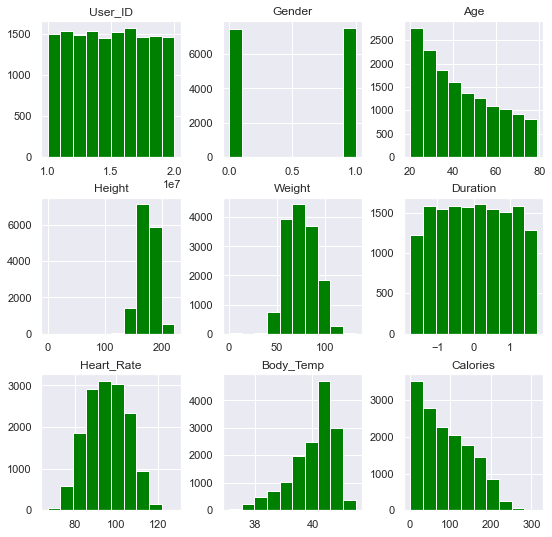

In [108]:
from matplotlib import pyplot
data.hist(color = "green", figsize = (9,9))

<font size="4">Gender Count using countplot</font>

<AxesSubplot:xlabel='Gender', ylabel='count'>

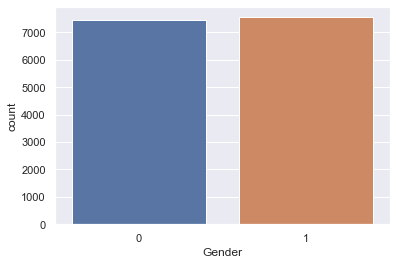

In [109]:

sb.countplot(data['Gender'])

<font size="4">Distribution of age,height,weight column using distplot</font>

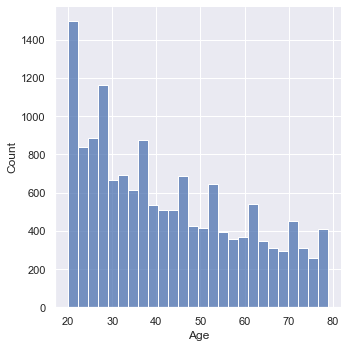

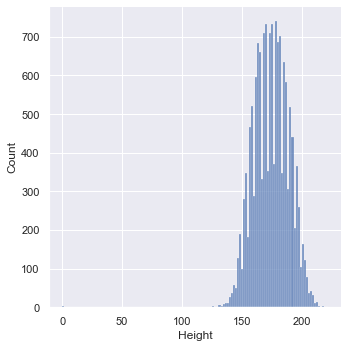

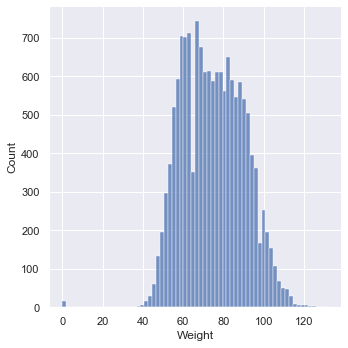

In [116]:

sb.displot(data['Age'])
sb.displot(data['Height'])
sb.displot(data['Weight'])

<font size="4">Box plot</font>

User_ID          AxesSubplot(0.125,0.657941;0.227941x0.222059)
Gender        AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Age           AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Height           AxesSubplot(0.125,0.391471;0.227941x0.222059)
Weight        AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Duration      AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Heart_Rate          AxesSubplot(0.125,0.125;0.227941x0.222059)
Body_Temp        AxesSubplot(0.398529,0.125;0.227941x0.222059)
Calories         AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

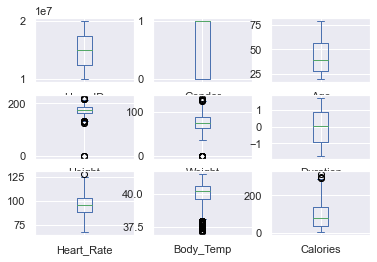

In [111]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False,sharey=False)


<font size="4">Density plot</font>

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

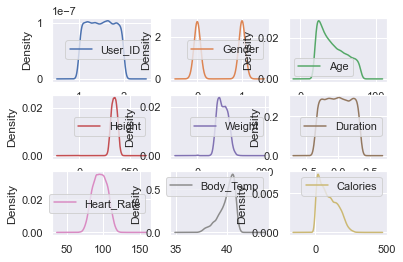

In [112]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Calories', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Calories'>,
        <AxesSubplot:xlabel='Calories', ylabel='Calories'>]], dtype=object)

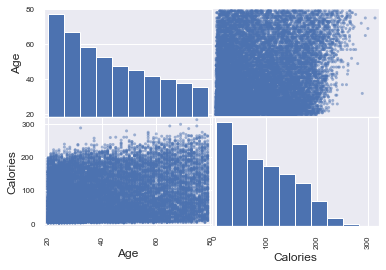

In [113]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['Age','Calories']])

<font size="4">Pair plot</font>

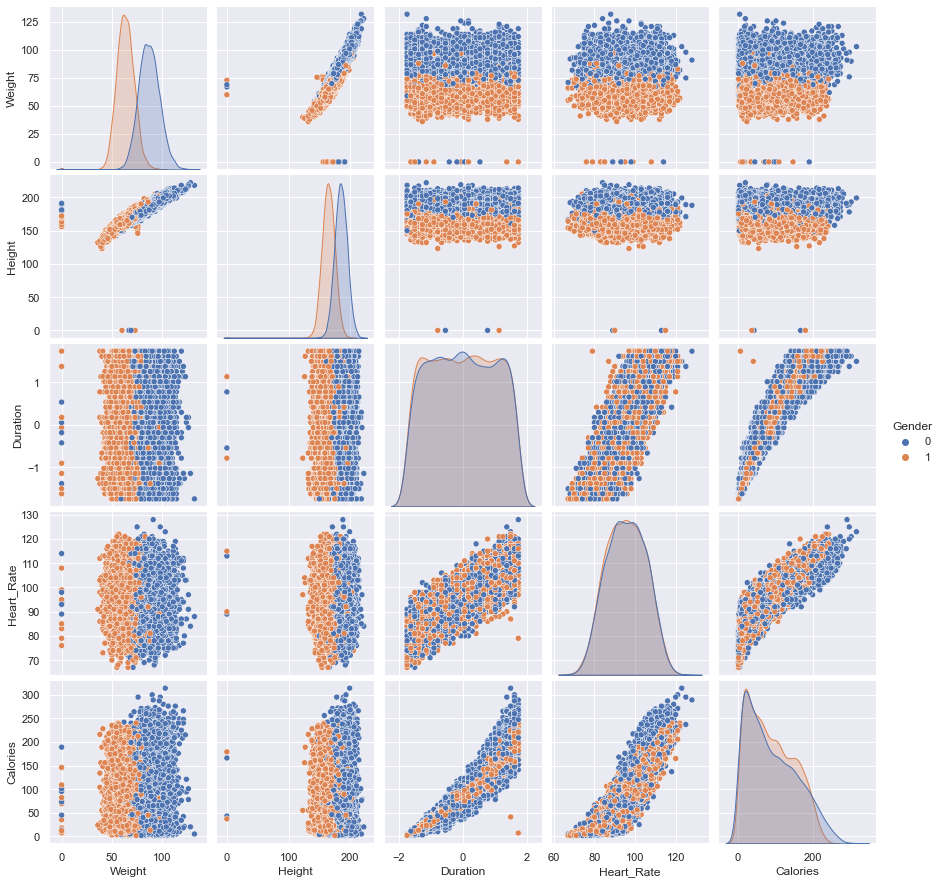

In [114]:
sb.pairplot(data[["Weight" , "Height" , "Duration" , "Heart_Rate" , "Calories" , "Gender"]] , hue = "Gender")

<font size="5">Exporting cleaned csv</font>

In [ ]:
data.to_csv('Dataset/dataset_cleaned.csv')